In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('zomato.csv', encoding='latin-1')
df1.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [3]:
df1.shape

(9551, 21)

In [4]:
#looking of columns
df1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
#Here we will drop unrelavent columns from df1. 
df1.drop(columns = ['Restaurant ID','Is delivering now'], inplace = True)

In [6]:
df1['Country Code'].nunique()  #To check the country count

15

In [7]:
df1['Country Code'].value_counts()

1      8652
216     434
215      80
214      60
30       60
189      60
148      40
208      34
14       24
162      22
94       21
191      20
166      20
184      20
37        4
Name: Country Code, dtype: int64

[162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]
[22, 60, 434, 24, 4, 20, 60, 8652, 21, 40, 80, 20, 60, 20, 34]


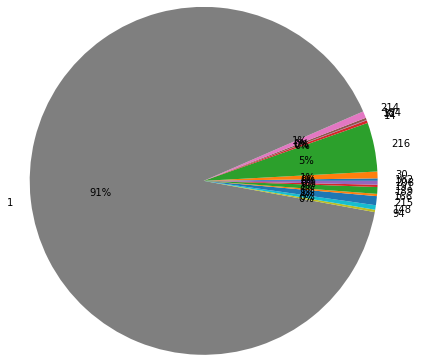

In [8]:
countries = df1['Country Code'].unique()
print(countries)
arr = []
for c in countries:
    dframe = df1[df1['Country Code']==c]
    n = dframe['Country Code'].count()
    arr.append(n)
print(arr)

import matplotlib.pyplot as plt
plt.pie(arr, labels = countries, autopct='%.0f%%', radius = 2)
plt.show()

We Can see from the above figure that 91% of the data comes from the country code 1 (India) Hence, we can take only the data from India for our Analysis.

As the data set shape is 9551 out of that we found that for the Country Code 1 we have 8652 that mean the more resturant are coming from single city. hence we will consider only Country Code 1 only other will drop. 

Now using mask we have to consider only Country Code 1  data. 

In [9]:
mask = df1['Country Code'] == 1
df1 = df1[mask]

In [10]:
df1.shape

(8652, 19)

Now here we can now drop the columns like Country Code and Currency

In [11]:
df1.drop(columns = ['Country Code','Currency'], inplace = True)

In [12]:
df1.columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
       'Has Table booking', 'Has Online delivery', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [13]:
df1['City'].nunique()

43

In [14]:
#df1['City'].value_counts()

In [15]:
mask = df1['City'].isin(['New Delhi','Gurgaon','Noida'])
df1 = df1[mask]

In [16]:
df1.shape

(7671, 17)

In [17]:
df1.head(2)

,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
1161,K Lab,Gurgaon,"Shop GF-18, ILD Trade Centre, Sector 47, Near ...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.03931,28.424831,"Cafe, Beverages",350,No,No,No,1,3.4,Orange,Average,16
1162,Pind Balluchi,Gurgaon,"112/112-A, 1st Floor, ILD Trade Centre, Near S...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.03922,28.424913,"North Indian, Mughlai",800,Yes,Yes,No,2,2.7,Orange,Average,80


In [18]:
df1.columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
       'Has Table booking', 'Has Online delivery', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [19]:
df1.drop(columns = ['Restaurant Name','Address', 'Locality', 'Locality Verbose','Rating color','Rating text	'], inplace = True)

KeyError: "['Rating text\\t'] not found in axis"

In [ ]:
df1.head(2)

In [ ]:
df1['Switch to order menu'].value_counts()

drop is as only No value is present in 'Switch to order menu' column.

In [ ]:
df1.drop(columns = ['Switch to order menu'], inplace = True)

In [ ]:
df1.head(2)

In [ ]:
df1.columns

In [ ]:
df1['Has Table booking'].value_counts()

In [ ]:
#Replace the YES as 1 and 0 as NO for column
df1['Has Table booking'].replace('Yes' ,1 , inplace = True)
df1['Has Table booking'].replace('No' ,0 , inplace = True)

In [ ]:
df1['Has Table booking'].value_counts()

In [ ]:
df1['Has Online delivery'].value_counts()

In [ ]:
#Replace the YES as 1 and 0 as NO for column
df1['Has Online delivery'].replace('Yes' ,1 , inplace = True)
df1['Has Online delivery'].replace('No' ,0 , inplace = True)

In [ ]:
df1['Has Online delivery'].value_counts()

In [ ]:
df1.head(2)

In [ ]:
df1.corr()['Average Cost for two']

if we see in above data we found that the correlation of Average Cost for two with other columns and if we see the of Longitude,Latitude and Has Online delivery is 0.0 having more difference. hence we will drop those columns.

And we talk about the Price range and Average Cost for two  is same thing and if we consider price range then it will get overfitting. hence we will also drop  Price range also. 

In [ ]:
df1.drop(columns = ['Longitude', 'Latitude', 'Has Online delivery' , 'Price range' ], inplace = True)

In [ ]:
df1.head(2)

In [ ]:
df1['Cuisines'].value_counts()

In [ ]:
#Here we have to replace the cuisines with effective means value.
cuisine = df1.groupby('Cuisines')['Average Cost for two'].mean().reset_index()

So this mean values come from the no. of count value of Cuisines

In [ ]:
df2 = df1.merge(cuisine, on = 'Cuisines')

In [ ]:
df2.head()

In [ ]:
df2.drop(columns = ['Cuisines' ], inplace = True)

In [ ]:
df2.head()

In [ ]:
df2.rename(columns = {'Average Cost for two_x':'Cost','Average Cost for two_y':'Cuisine'},inplace = True)

In [ ]:
df2.head() 

In [ ]:
df2.columns

In [ ]:
#Giving the columns order accordingly my need.  
df2=df2[['City','Has Table booking','Aggregate rating','Cuisine','Votes','Cost']]   #Resuffling

In [ ]:
df2.head(2)

In [ ]:
X = df2.iloc[:,:-1].values
y = df2.iloc[:, -1].values

In [ ]:
X

In [ ]:
y

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
X[:, 0] = encoder.fit_transform(X[:, 0])

In [ ]:
X

In [ ]:
#OneHotCoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)

In [ ]:
X.shape

In [ ]:
X = X[:,1:]

In [ ]:
X.shape

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred,)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 200)
model = rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
r2_score(y_test,y_pred)

## Performing 10 fold cross validation to get the best accuracy

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(model, X, y, cv=10) #cv = 10 determines the k value for the k-fold cross validation
print ('Cross-validated scores:', scores*100)
print ('Avearge Accuracy:', np.mean(scores)*100)
print ('Best Accuracy:', max(scores)*100)